In [47]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Supervised Learning

In [24]:
data = load_iris()

iris = pd.DataFrame(data.data, columns=['SL', 'SW', 'PL', 'PW'])
iris['label'] = data.target
iris.head()

,SL,SW,PL,PW,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [26]:
iris.shape

(150, 5)

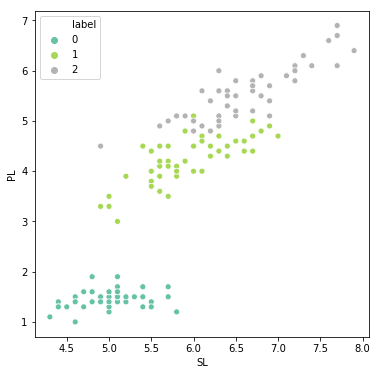

In [34]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='SL', y='PL', hue='label', palette='Set2', data=iris)

In [40]:
model = RandomForestClassifier(random_state=0)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(iris[['SL','PL']], iris[['label']])

In [42]:
model.fit(x_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [43]:
y_pred = model.predict(x_test)

In [44]:
accuracy_score(y_pred, y_test)

0.9736842105263158

## Unsupervised Learning 

In [63]:
data = load_iris()

iris = pd.DataFrame(data.data, columns=['SL', 'SW', 'PL', 'PW'])
iris.head()

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


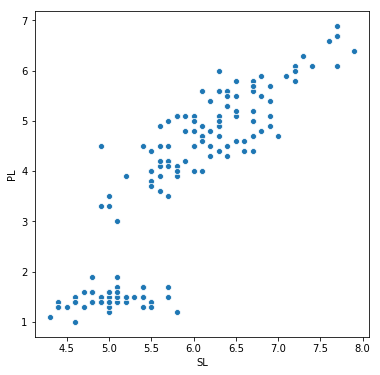

In [64]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='SL', y='PL', palette='Set2', data=iris)

In [65]:
model = NearestNeighbors(n_neighbors=2, algorithm='ball_tree')

In [66]:
model.fit(iris[['SL','PL']])

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                 radius=1.0)

In [67]:
# model.predict

In [61]:
grid = model.kneighbors_graph(iris[['SL','PL']]).toarray()

In [62]:
grid.shape

(150, 150)

## Reinforcement Learning